In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
data=pd.read_csv('Boston House Price Data.csv')
print(data)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.

In [ ]:
pip install scikit-learn


In [26]:
y=data['PRICE']
x = data.drop(['PRICE'], axis=1)
print(x)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [27]:
from sklearn.model_selection import train_test_split 

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [30]:
#train the model 
model=LinearRegression()

In [31]:
model.fit(X_train, y_train)

LinearRegression()

In [32]:
#check the coffeicient
print("Intercept : ", model.intercept_)
print("Coefficeints :", model.coef_)

Intercept :  30.24675099392349
Coefficeints : [-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]


In [33]:
#prediciting the model
y_pred=model.predict(X_test)

In [34]:
#compairing the  actual vs predicted value
#results=pd.DataFrame(('Actual' : y_test, 'Predicted' :

In [37]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [38]:
print("Mean  Abosolute error: ", mae)
print("Mean squared error : ",mse)
print("R-squared  :", r2)

Mean  Abosolute error:  3.1890919658878416
Mean squared error :  24.291119474973538
R-squared  : 0.6687594935356317


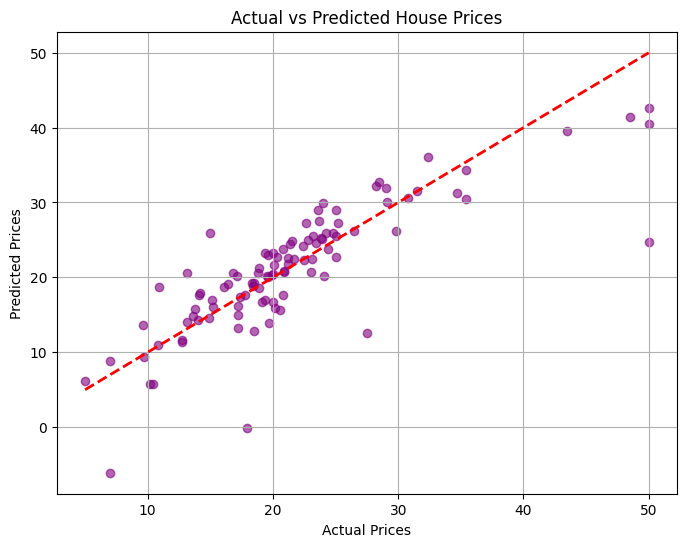

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='purple', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()


In [42]:
import pickle 
# save the trained model to a file 
with open ('linear_model.pkl', 'wb') as file  :
    pickle .dump (model,file)

In [44]:
with open('linear_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


In [45]:
dummy_input = [[0.03, 25.0, 5.13, 0, 0.453, 6.2, 45.0, 5.5, 4, 300.0, 16.0, 390.0, 5.0]]
predicted_price = model.predict(dummy_input)
print("Predicted House Price:", predicted_price[0])


Predicted House Price: 28.16721013435891


C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


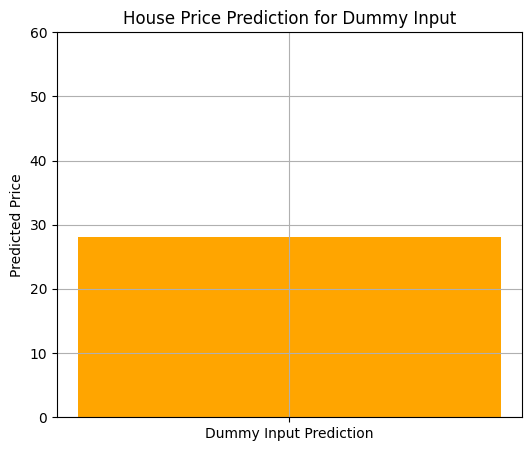

In [46]:
predicted_price = model.predict(dummy_input)[0]

# Bar chart
plt.figure(figsize=(6, 5))
plt.bar(['Dummy Input Prediction'], [predicted_price], color='orange')
plt.ylabel("Predicted Price")
plt.title("House Price Prediction for Dummy Input")
plt.ylim(0, max(y_test)*1.2)
plt.grid(True)
plt.show()

NameError: name 'dummy_price' is not defined

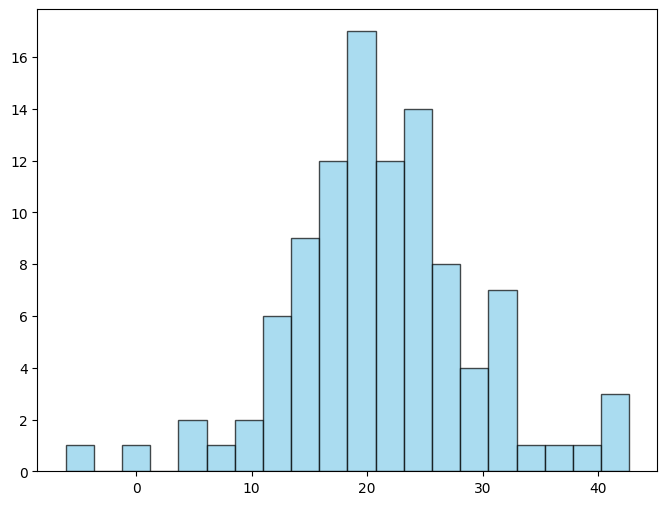

In [47]:
plt.figure(figsize=(8, 6))
plt.hist(y_pred, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(dummy_price, color='red', linestyle='dashed', linewidth=2, label=f'Dummy Prediction: {dummy_price:.2f}')

plt.xlabel('Predicted House Prices')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Prices with Dummy Input')
plt.legend()
plt.grid(True)
plt.show()